# Decision analysis with `rdecision` using Petitti, 2000, 2e. - Chapter 2 (Part 1)
Tomás Aragón, Updated 2026-01-14

Chapter 2 from Petitti, Diana B. Meta-Analysis, Decision Analysis, and Cost-Effectiveness Analysis: Methods for Quantitative Synthesis in Medicine. 2nd ed. Monographs in Epidemiology and Biostatistics, v. 31. Oxford University Press, 2000. https://doi.org/10.1093/acprof:oso/9780195133646.001.0001.


This Jupyter R notebook was created in VS Code and contains examples from Petitti 2000, Chapter 2 using R code.

If you are not already using R in VS Code, then use Positron from Posit (https://positron.posit.co/). Positron is a free IDE for data science designed to support Python and R (Julia works too). Positron is built on the same open-source foundation as Visual Studio Code (VS Code).   

We will use `rdecision` R package: https://cran.r-project.org/web/packages/rdecision/index.html

The `rdecision` CRAN page has links to several vignettes using health decision analysis examples.

Preparation:
- Read [Section 2.2 of Chapter 2](https://github.com/tomasaragon/di4h/blob/main/files/Decision-Analysis_Petitti_2000_isbn_9780195133646_ch02.pdf) in Petitti 2000 book. 
- Review [Introduction to the construction of decision trees](https://cran.r-project.org/web/packages/rdecision/vignettes/DT00-DecisionTreeTutorial.html) from the `rdecision` package CRAN page.  

Optional readings for background:
- Owens, Douglas K. “Analytic Tools for Public Health Decision Making.” Medical Decision Making: An International Journal of the Society for Medical Decision Making 22, no. 5 Suppl (2002): S3-10. https://doi.org/10.1177/027298902237969.
- Owens, D. K., R. D. Shachter, and R. F. Nease. “Representation and Analysis of Medical Decision Problems with Influence Diagrams.” Medical Decision Making: An International Journal of the Society for Medical Decision Making 17, no. 3 (1997): 241–62. https://doi.org/10.1177/0272989X9701700301.
- Nease, R. F., and D. K. Owens. “Use of Influence Diagrams to Structure Medical Decisions.” Medical Decision Making: An International Journal of the Society for Medical Decision Making 17, no. 3 (1997): 263–75. https://doi.org/10.1177/0272989X9701700302.
- Neapolitan, Richard, Xia Jiang, Daniela P. Ladner, and Bruce Kaplan. “A Primer on Bayesian Decision Analysis With an Application to a Kidney Transplant Decision.” Transplantation 100, no. 3 (2016): 489–96. https://doi.org/10.1097/TP.0000000000001145.

## Background: Bayes' Theorem and Decision Trees
Here is a brief overview of Bayes' Theorem (FIGURE 1) as background:
1. Update prior probability to posterior probability with new evidence.
2. Calculate marginal probabilities of evidence for decision analysis (aka, "folding back").
3. Calculate expected values of decision options for decision analysis (aka, "folding back and averaging").
4. Calculate measures of associations for causal inference or decision analysis (#3). 

<figure>
<img src="img_bayesian_thm_1.png" width="800" alt="Petitti 2000 Figure 2-1"/>
<figcaption>FIGURE 1</figcaption>
</figure>

### Bayes's Theorem
#### Figure 2 Explanation
First, Bayes's theorem is used for update prior probability to posterior probability when new evidence is available.

$$P(H) \rightarrow P(H \mid E)$$

Second, the Bayes' theorem denominator is used to calculate the marginal probability of evidence, $P(E)$, for decision trees. 

$$P(E) = P(H) P(E \mid H) + P(H^c) P(E \mid H^c)$$

<figure>
<img src="img_bayesian_thm_2.png" width="800" alt="Petitti 2000 Figure 2-1"/> 
<figcaption>FIGURE 2</figcaption> 
</figure>

Here is the Bayesian network equivalent of FIGURE 2:

<figure>
<img src="img_2_nodes_bayesian_network.png" width="300" alt="Petitti 2000 Figure 2-1"/>
</figure>

#### Figure 3 Explanation

Third, when we convert the first chance node into a decision node, we can use the expected value (EV) formula to calculate the expected value of each decision branch.

$$ EV_1 = P( E \mid H ) \times v_1,\quad \text{where } v_1 = f_1(\text{utility, costs, benefits}) $$


$$ EV_2 = P( E \mid H^c ) \times v_2,\quad \text{where } v_2 = f_2(\text{utility, costs, benefits}) $$

Fourth, we can compare $P( E \mid H )$ to $P( E \mid H^c )$ for the purposes of causal inference (risk ratio, risk difference, odds ratio, etc.). 

<figure>
<img src="img_bayesian_thm_3.png" width="800" alt="Petitti 2000 Figure 2-1"/>  
<figcaption>FIGURE 3</figcaption>
</figure>

Here is the decision network equivalent of FIGURE 3:

<figure>
<img src="img_2_nodes_decision_network.png" width="300" alt="Petitti 2000 Figure 2-1"/>
</figure>

Here is the 2x2 table equivalent of FIGURE 3:

<figure>
<img src="img_tab_decision_tree_2x2_table2.png" width="600" alt="Petitti 2000 Figure 2-1"/>
<figcaption></figcaption>
</figure>

## Using `rdecision` R package to draw Figure 2-1 from Petitti Chapter 2

A decision tree is equivalent to an influence diagram, and both have nodes and edges. 

Nodes are variables and include:
- **Decision** nodes (represented as squares)
- **Chance** nodes (represented as circles)
- **Leaf** nodes (also called terminal, utility, or value nodes)

Edges connect nodes and include:
- **Action** edges eminating from decision nodes
- **Reaction** edges eminating from chance nodes

In `rdecision`, here key functions and their arguments:
- `DecisionNode$new(label = "")`
- `ChanceNode$new(label = "")`
- `LeafNode$new(label = "", utility = 0)`
- `Action$new(source_node, target_node, label, cost = 0, benefit = 0)`   

Figure 2-1 from Petitti 2000 book is reproduced below using `rdecision` package. 

<img src="Petitti_2000_2e_ch02_fig2-1.png" width="600" alt="Petitti 2000 Figure 2-1"/>

Moving from left to right and top to bottom I label the nodes and edges as follows:
- d1, etc. for one or more decision nodes
- c1, c2, etc. for chance nodes
- e1, e2, etc. for edges (actions or reactions)
- t1, t2, etc. for terminal (leaf) nodes

This makes writing and following the R code easier.

Figure 2-1 is displayed below, but now with my labels (d1, c1, e1, t1, etc.) added.

<img src="Petitti_2000_2e_ch02_fig2-1_annotated.png" width="600" alt="Petitti 2000 Figure 2-1"/>

Now we can create the decision tree in R using the `rdecision` package. I create all the nodes first, then the edges, and finally the decision tree object. This works because the nodes must exist before they can be connected by edges.  

In [2]:
library(rdecision)

In [3]:
# create all nodes first
## terminal nodes
t1 = LeafNode$new("Outcome 1 (t1)")
t2 = LeafNode$new("Outcome 2 (t2)")
t3 = LeafNode$new("Outcome 3 (t3)") 
t4 = LeafNode$new("Outcome 4 (t4)")

## chance nodes
c1 = ChanceNode$new("Chance Node (c1)")
c2 = ChanceNode$new("Chance Node (c2)")

## decision node
d1 = DecisionNode$new("Decision Node (d1)")

# create edges after nodes
## edges
e1 = Action$new(d1, c1, label = "Decision Option (e1)")
e2 = Action$new(d1, c2, label = "Alternative Action (e2)")
e3 = Reaction$new(c1, t1, label = "Event 1 (e3)")
e4 = Reaction$new(c1, t2, label = "Event 2 (e4)")
e5 = Reaction$new(c2, t3, label = "Event 3 (e5)")
e6 = Reaction$new(c2, t4, label = "Event 4 (e6)")

# create lists of nodes (aka, vertices) and edges
V = list(
  d1, c1, c2, t1, t2, t3, t4
)
E = list(
  e1, e2, e3, e4, e5, e6
)

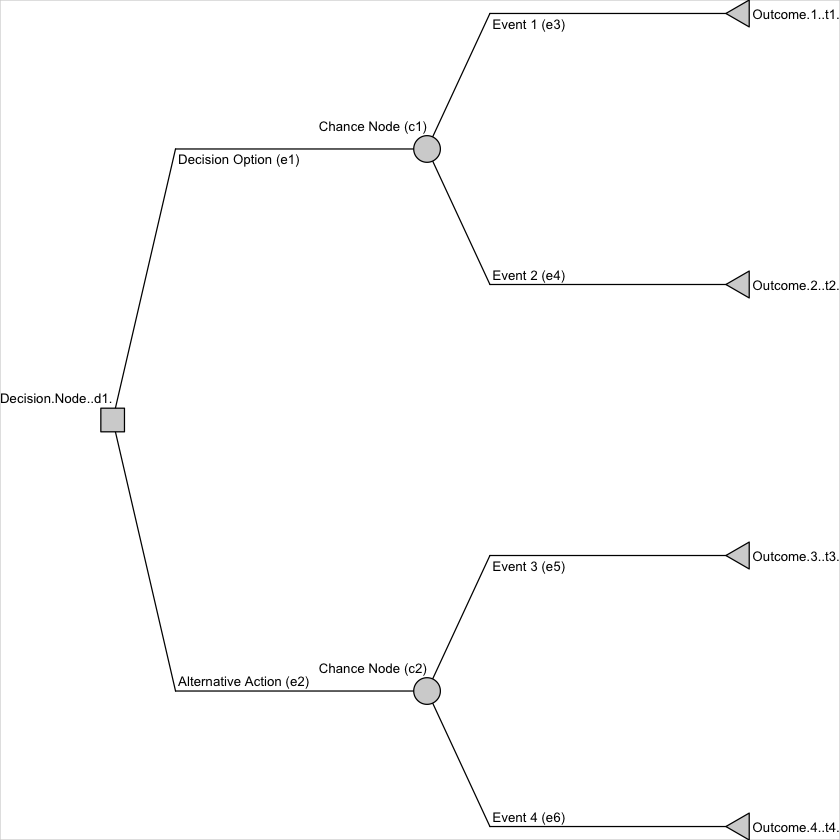

In [4]:
# tree
dt = DecisionTree$new(V, E)
dt$draw(border = TRUE)

Yeah! We can see how simple it is to create decision trees using `rdecision` package.